# Machine Learning for Regression- Car price prediction

### Data preparation

In [132]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
url = 'https://raw.githubusercontent.com/v-devaraj/learn-machine-learning/refs/heads/main/applied-ml/02-regression/data/data.csv'

In [18]:
df = pd.read_csv(url)

In [20]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


- column names are slightly inconsistent.
- Let us make them consistent.

In [24]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [26]:
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


- note that even some of the values are inconsistent. For example, transmiaaion_type has values in all capitals and engine fuel_type has values in small letters. We will take care of these inconsistencies.

In [31]:
object_columns = list(df.dtypes[df.dtypes == 'object'].index)
object_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [35]:
for col in object_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [36]:
df.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350


### Exploratory Data Analysis

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [44]:
df.describe().round(2)

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.00,11845.00,11884.00,11908.00,11914.00,11914.00,11914.00,11914.00
mean,2010.38,249.39,5.63,3.44,26.64,19.73,1554.91,40594.74
std,7.58,109.19,1.78,0.88,8.86,8.99,1441.86,60109.10
min,1990.00,55.00,0.00,2.00,12.00,7.00,2.00,2000.00
25%,2007.00,170.00,4.00,2.00,22.00,16.00,549.00,21000.00
50%,2015.00,227.00,6.00,4.00,26.00,18.00,1385.00,29995.00
75%,2016.00,300.00,6.00,4.00,30.00,22.00,2009.00,42231.25
max,2017.00,1001.00,16.00,4.00,354.00,137.00,5657.00,2065902.00


In [45]:
df.describe(include='object')

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,914,10,5,4,71,3,16
top,chevrolet,silverado_1500,regular_unleaded,automatic,front_wheel_drive,crossover,compact,sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


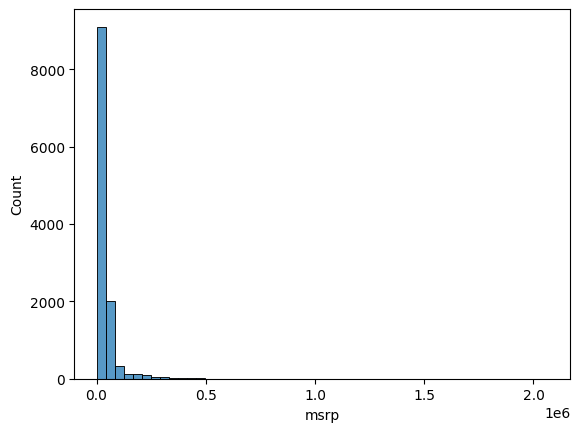

In [57]:
# Let us try to plot the distribution of the target variable price
sns.histplot(df['msrp'],
             bins = 50)
plt.show()

- this distribution is right skewed. Most cars are priced below 50,000 USD.
- there are some cars which are priced very high. These could be luxury cars.
- we will need to treat these outliers before we build a regression model.
- as long tailed distributions confuses the model, we will have to transform this variable to make it more normally distributed.
- we will use log transformation for this.
- we will also need to treat the missing values in this variable.

- we will try to zoom in a bit and understand the data better.

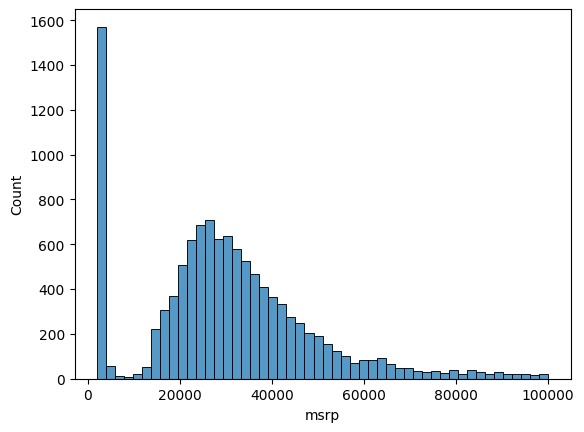

In [59]:
# Let us try to plot the distribution of the target variable price
sns.histplot(df['msrp'][df['msrp'] < 100000],
             bins = 50)
plt.show()

In [60]:
df['msrp'].min()

np.int64(2000)

- The long bar in the histogram shows that there are many cars which are priced the minimum price mentioned in the platform (2,000 USD). This could be because the sellers wanted to quickly sell these cars and hence listed them at the minimum price. We will need to treat these values as well.

In [ ]:
# applying log transformation to the target variable
df['log_msrp'] = np.log1p(df['msrp'])   #np.log1p() adds '1' to the input and then applies log transformation. This is useful when the input data contains '0' values.

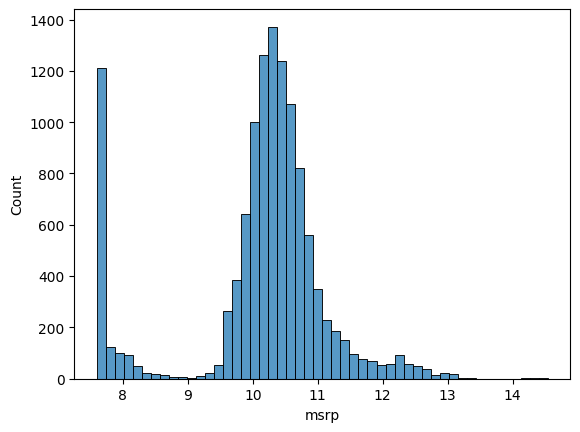

In [381]:
sns.histplot(np.log1p(df['msrp']),
             bins = 50)
plt.show()

- note that the log transformation has made the distribution more normal.

### Missing value treatment

In [69]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Setting up the validation framework

- in this step, we will split the data into training and validation and test sets.
- we will use 60% of the data for training, 20% for validation and 20% for testing.

In [285]:
dataset_size = df.shape[0]

validation_size = int(0.2 * dataset_size)
test_size = int(0.2 * dataset_size)
train_size = dataset_size - (validation_size + test_size)

print(f"Dataset size is: {dataset_size}")
print(f"Training set size is: {train_size}")
print(f"Validation set size is: {validation_size}")
print(f"Test set size is: {test_size}")

Dataset size is: 11914
Training set size is: 7150
Validation set size is: 2382
Test set size is: 2382


- It is important to shuffle the data before splitting it into training, validation and test sets. This ensures that the data is randomly distributed across the sets.


In [287]:
idx = np.arange(dataset_size)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913], shape=(11914,))

In [288]:
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [289]:
train_idx = idx[:train_size]
validation_idx = idx[train_size:train_size + validation_size]
test_idx = idx[train_size + validation_size:]

In [290]:
df_train = df.iloc[train_idx]
df_validation = df.iloc[validation_idx]
df_test = df.iloc[test_idx]

In [92]:
df_train.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795


In [291]:
df_train.reset_index(drop = True, inplace = True)
df_validation.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

In [292]:
y_train = np.log1p(df_train['msrp'].values)
y_validation = np.log1p(df_validation['msrp'].values)
y_test = np.log1p(df_test['msrp'].values)

In [ ]:
# Let us now delete the target variable from the dataframes
# del df_train['msrp']
# del df_validation['msrp']
# del df_test['msrp']

In [294]:
df_train.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640


In [110]:
df_validation.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385
1,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657


In [111]:
df_test.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549
1,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617
2,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031


In [114]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

### Linear Regression- Simple model

- g(X(i)) = y(i) = w0 + w1*x1 + w2*x2 + ... + wn*xn = w0 + Σ(wj*xj)
  - y(i) is the actual value
- where,
  - g(X) is the predicted value
  - w0 is the intercept
  - w1, w2, ..., wn are the coefficients of the features x1, x2, ..., xn

In [116]:
df_train.loc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

- for simplicity, we will use only numerical features such as **engine_hp, city_mpg** and **popularity** for building the linear regression model.

- For simplicity, let us consider only 3 features - engine_hp, city_mpg and popularity and let us just consider a small data set as shown below.
- Let us see how linear regression works using this small data set.

In [135]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [138]:
def linear_regression(xi):
    
    result = w0

    for j in range(len(xi)):
        result += w[j] * xi[j]
    
    return result

In [139]:
linear_regression(xi)

12.312

In [141]:
print(f'Predicted price of this car is: RS {np.exp(12.312 + 1).round(2)}')

Predicted price of this car is: RS 604405.13


### Linear Regression- Vector Form

- g(X(i)) = W0 + Sigma(Wj * Xj)= W0 + W1*X1 + W2*X2 + ... + Wn*Xn

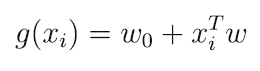

where
- w0 is the bias term.
- w is the n-dimensional vector of weights.

In [167]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [147]:
def dot(xi, w):

    result = 0

    for j in range(len(xi)):
        result += xi[j] * w[j]
    
    return result

In [152]:
def linear_regression(xi, w):
    return np.round(w0 + dot(xi, w), 2)

In [153]:
linear_regression(xi, w)

np.float64(12.31)

In [154]:
def linear_regression(xi, w):
    return np.round(w0 + np.dot(xi, w), 2)

In [155]:
linear_regression(xi, w)

np.float64(12.31)

In [168]:
# let us now try to prepend the bias term to the w right infront of w1
w = [w0] + w
w

[7.17, 0.01, 0.04, 0.002]

- Because now w becomes a (n+1)-dimensional vector, we also need to adjust the feature vector xi so that the dot product between them still works. 
- We can do this easily by adding a dummy feature xi 0, which always takes the value 1.
- Then we prepend this new dummy feature to xi right before xi1:

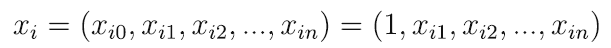

- With these modifications, we can express the model as the dot product between the new xi and the new w:

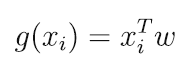

In [169]:
def linear_regression(xi):
    xi = [1] + xi
    return np.dot(xi, w)

In [170]:
linear_regression(xi)

np.float64(12.312)

In [173]:
xi = [1] + xi
print(xi, w, sep = '\n')

[1, 1, 1, 453, 11, 86]
[7.17, 0.01, 0.04, 0.002]


- Now let us take a bit more complex example with 3 records:

In [181]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w
print(w_new)

[7.17, 0.01, 0.04, 0.002]


In [180]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = np.array([x1, x2, x10])
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [182]:
def linear_regression(X):
    return np.dot(X, w_new)

In [183]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

- We are ready to consider the bigger picture again and talk about the matrix form.
- There are many observations and xi is one of them. 
- Thus, we have m feature vectors x1, x2, …, xi, …, xm, and each of these vectors consists of n+1 features:

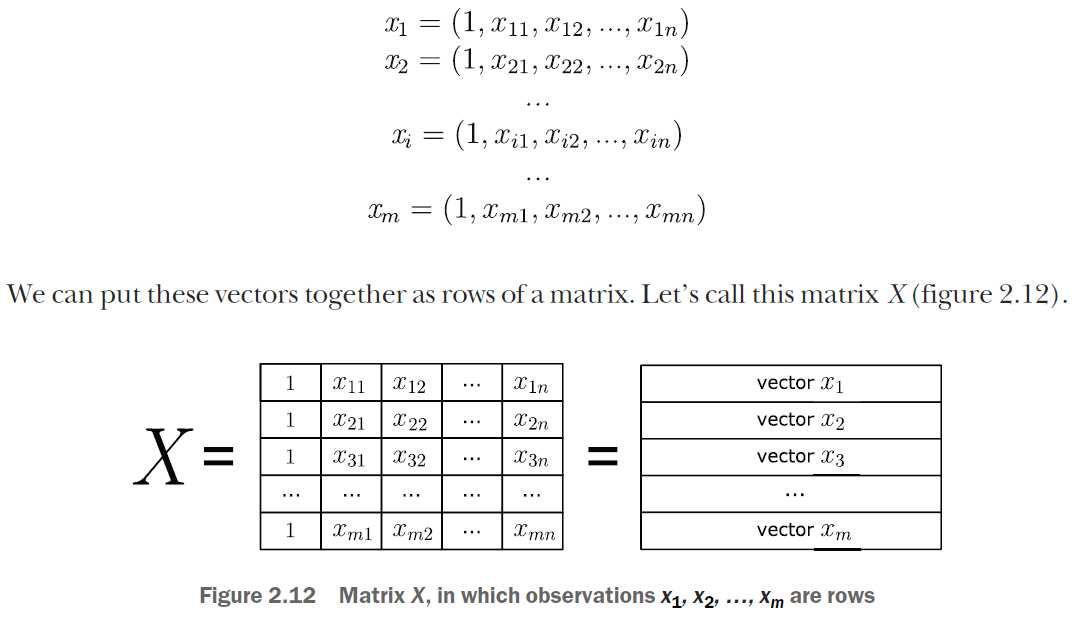

In [ ]:
# Or straight away we may write the function as below:
np.matmul(X, w_new)

array([12.38 , 13.552, 12.312])

### Training a linear regression model

- Our aim in this whole process is to find the best set of weights w that minimizes the error in our predictions.
- Mathematically, we can express this as given below:

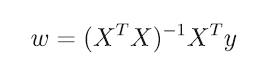

- and the above shown formula directly translates to
`np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)`

In [239]:
def train_linear_regression(X, y):
    # add dummy column of 1s to X:
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))

    # calculate weights using the normal equation
    w = np.linalg.inv(np.matmul(X.T, X)).dot(X.T).dot(y)

    return w[0], w[1:]

# alternatively
# def train_linear_regression(X, y):
#     # add dummy column of 1s to X:
#     ones = np.ones(X.shape[0]).reshape(X.shape[0], -1)
#     X = np.hstack((ones, X))

#     # calculate weights using the normal equation
#     w = np.linalg.inv(np.matmul(X.T, X)).dot(X.T).dot(y)

#     return w[0], w[1:]

### Baseline Model

In [246]:
df_train.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640


In [249]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_train_num = df_train[base]
df_train_num.head(3)

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640


In [250]:
df_train_num = df_train_num.fillna(0)
X_train = df_train_num.values

In [251]:
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [253]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [254]:
w_0, w = train_linear_regression(X_train, y_train)

In [257]:
y_pred = w_0 + np.matmul(X_train, w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

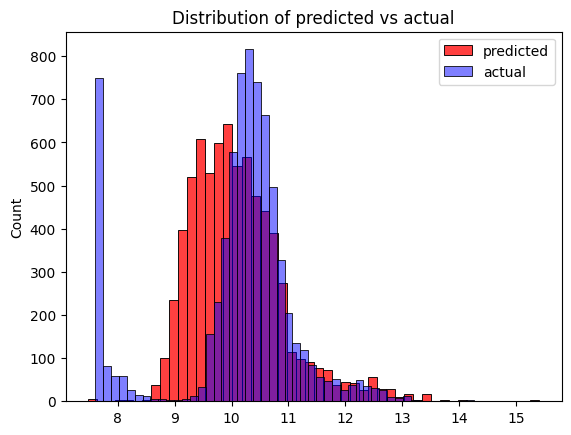

In [263]:
sns.histplot(y_pred, bins = 50, color = 'red', label = 'predicted')
sns.histplot(y_train, bins = 50, color = 'blue', alpha = 0.5, label = 'actual')
plt.legend()
plt.title('Distribution of predicted vs actual')
plt.show()

- We can see from the above plot that the distribution of values we predicted looks quite different from the actual values. 
- This result may indicate that the model is not powerful enough to capture the distribution of the target variable. 
- This shouldn’t be a surprise to us: the model we used is quite basic and includes only five very simplefeatures.

### Root Mean Squared Error (RMSE)

- It is a metric that quantifies the quality of the model.

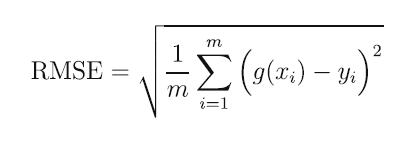

In [325]:
def rmse(y_pred, y_train):
    return np.sqrt(((y_pred - y_train) ** 2).mean())

In [ ]:
rmse_train = rmse(y_pred, y_train)
print(f'Root Mean Squared Error of the model on training set is: {rmse_train.round(2)}')

Root Mean Squared Error of the model on training set is: 0.76


### Validating the model on validation set

In [303]:
df_validation.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385
1,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657


In [304]:
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [305]:
df_validation_new = df_validation[base]
df_validation_new.head(3)

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,200.0,4.0,25,19,1385
1,241.0,4.0,29,22,617
2,160.0,4.0,36,26,5657


In [ ]:
df_validation_new = df_validation_new.fillna(0)

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,200.0,4.0,25,19,1385
1,241.0,4.0,29,22,617
2,160.0,4.0,36,26,5657
3,290.0,6.0,34,21,204
4,170.0,4.0,34,25,873
...,...,...,...,...,...
2377,240.0,4.0,37,25,870
2378,444.0,8.0,20,13,238
2379,332.0,8.0,23,20,1624
2380,148.0,4.0,34,24,436


In [307]:
X_validation = df_validation_new.values
X_validation

array([[2.000e+02, 4.000e+00, 2.500e+01, 1.900e+01, 1.385e+03],
       [2.410e+02, 4.000e+00, 2.900e+01, 2.200e+01, 6.170e+02],
       [1.600e+02, 4.000e+00, 3.600e+01, 2.600e+01, 5.657e+03],
       ...,
       [3.320e+02, 8.000e+00, 2.300e+01, 2.000e+01, 1.624e+03],
       [1.480e+02, 4.000e+00, 3.400e+01, 2.400e+01, 4.360e+02],
       [2.900e+02, 6.000e+00, 2.500e+01, 1.800e+01, 1.720e+03]],
      shape=(2382, 5))

In [308]:
y_validation

array([10.19936098, 10.90872279,  9.72770457, ..., 11.21756062,
        9.77542688, 10.1924563 ], shape=(2382,))

In [309]:
y_validation_pred = w_0 + np.matmul(X_validation, w)
y_validation_pred

array([ 9.86288014, 10.37013608,  9.69868129, ..., 10.4916625 ,
        9.57091361, 10.40022147], shape=(2382,))

In [317]:
rmse_train = rmse(y_validation_pred, y_validation)
print(f'Root Mean Squared Error of the model on training set is: {rmse_train.round(2)}')

Root Mean Squared Error of the model on training set is: 0.76


- Now let us introduce a function, which reduces our effort in terms of preparing the dataframe into a format suitable for regression.

In [319]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [320]:
# We also have the following ones:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [321]:
# For validation
X_val = prepare_X(df_validation)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_validation, y_pred))

validation: 0.761653099130156


### Feature Engineering

- we have already set up the validation framework, we can easily verify whether adding new features improves the quality of the model.
- Our aim is to improve the RMSE calculated on the validation data.

- First, we create a new feature, “age,” from the feature “year.” The age of a car should be very helpful when predicting its price: intuitively, the newer the car, the more expensive it should be.
- Because the dataset was created in 2017 (which we can verify by checking df_train.year.max()), we can calculate the age by subtracting the year when the car was made from 2017:

In [322]:
df_train['age'] = 2017 - df_train['year']

C:\Users\devar\AppData\Local\Temp\ipykernel_26532\3591953268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['age'] = 2017 - df_train['year']


- now let us try to add this calculatig age step into the preprocessing function.

In [323]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,age
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,9
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,5
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,26
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,2
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,2
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,2
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,3


In [324]:
def prepare_X(df):

    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df['year']
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

- We create a copy of the DataFrame df that we pass in the function. Later in the code, we modify df by adding extra rows in d.
- This kind of behavior is known as a side effect: the caller of the function may not expect the function to change the DataFrame. To prevent the unpleasant surprise, we instead modify the copy of the original DataFrame.

- Let’s test if adding the feature “age” leads to any improvements:

In [326]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_validation)
y_pred = w_0 + np.matmul(X_val, w)
print('validation:', rmse(y_pred, y_validation))

validation: 0.5172055461058299


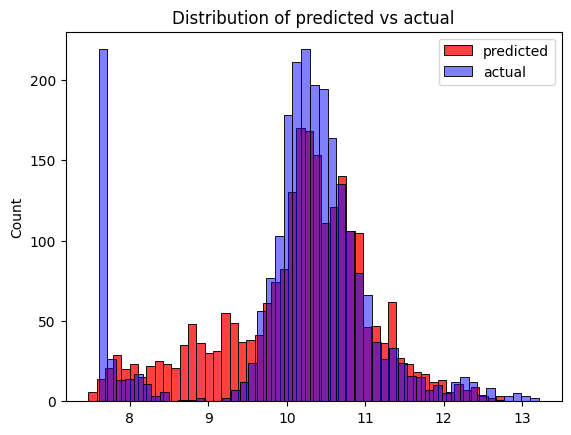

In [328]:
# Now let us look at the distribution of the predicted values vs actual values:
sns.histplot(y_pred, bins = 50, color = 'red', label = 'predicted')
sns.histplot(y_validation, bins = 50, color = 'blue', label = 'actual', alpha = 0.5)
plt.legend()
plt.title('Distribution of predicted vs actual')
plt.show()

### Handling categorical variables

- We can use categorical variables in a machine learning model in multiple ways.
- One of the simplest ways is to encode such variables by a set of binary features, with a separate feature for each distinct value.

In [330]:
# Let us look at the categorical column of no of doors:
df['number_of_doors'].head()

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: number_of_doors, dtype: float64

In [343]:
df['number_of_doors'].value_counts()

number_of_doors
4.0    8353
2.0    3160
3.0     395
Name: count, dtype: int64

- not that though this columns has the values of 2, 3 or 4, this is actually a categorical variable.
- Instead of this one column, we will create 3 binary columns - is_2_doors, is_3_doors and is_4_doors.

In [357]:
for value in [2, 3, 4]:
    df_train['num_doors_%s' %value] = (df_train['number_of_doors'] == value).astype(int)

C:\Users\devar\AppData\Local\Temp\ipykernel_26532\3004930775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['num_doors_%s' %value] = (df_train['number_of_doors'] == value).astype(int)
C:\Users\devar\AppData\Local\Temp\ipykernel_26532\3004930775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['num_doors_%s' %value] = (df_train['number_of_doors'] == value).astype(int)
C:\Users\devar\AppData\Local\Temp\ipykernel_26532\3004930775.py:2: SettingWithCopyWarning: 
A value is trying to be 

- now, let us include the above idea into the preprocessing function.

In [361]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)
    
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

- now let us see if this code improves the model:

In [362]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_validation = prepare_X(df_validation)
y_pred = w_0 + np.matmul(X_validation, w)
print('validation:', rmse(y_pred, y_validation))

validation: 0.5076038849556795


- The previous value was 0.517, so we managed to improve the RMSE score further.
- We can use a few more variables: engine_fuel_type, transmission_type, driven_wheels, market_category, vehicle_size, and vehicle_style. Let’s do the same thing for them. After the modifications, the prepare_X starts looking a bit more complex.

In [363]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheels_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

- now let us test it once more:

In [364]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_validation)
y_pred = w_0 + np.matmul(X_val, w)
print('validation:', rmse(y_pred, y_validation))

validation: 71.37786410717939


- this inclusion of a few more features into the model actually worsened the RMSE score a bit. This is because some of these features may not be very relevant for predicting the price of a car. We will need to do some feature selection to select only the relevant features.

- In the next section, we will see why it happens and how to deal with it.

### Regularization

- Adding correlated features can make $X^TX$ nearly singular, causing **numerical instability** and exploding weights in linear regression. **Ridge regression** fixes this by adding a small value $\alpha$ to the diagonal ($X^TX + \alpha I$), ensuring the matrix is invertible and stabilizing the model.

- Let’s create a new function that uses this idea and implements linear regression with regularization.

In [368]:
def train_linear_regression_reg(X, y, r = 0):
    # add dummy column of 1s to X:
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))

    # add r to the main diagonal of X.T * X
    XTX = np.matmul(X.T, X)
    reg = r * np.identity(XTX.shape[0])
    XTX = XTX + reg
    
    # calculate weights using the normal equation
    w = np.linalg.inv(XTX).dot(X.T).dot(y)

    return w[0], w[1:]

- extra parameter r that controls the amount of regularization — this corresponds to the number α in the formula that we add to the main diagonal of X TX.
- Regularization affects the final solution by making the components of w smaller.
- We can see that the more regularization we add, the smaller the weights become.

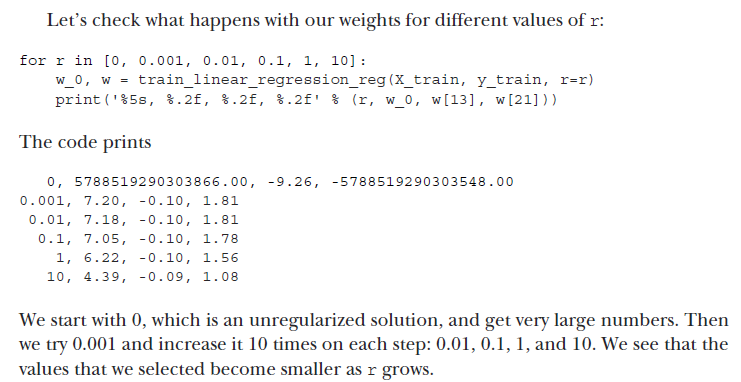

- Now let’s check whether regularization helps with our problem and what RMSE we get after that. Let’s run it with r=0.001:

In [369]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r = 0.001)

X_val = prepare_X(df_validation)
y_pred = w_0 + np.matmul(X_val, w)
print('validation:', rmse(y_pred, y_validation))

validation: 0.46022676273364194


- Sometimes, when adding a new feature causes performance degradation, simply removing this feature may be enough to solve the problem. 
- Having a validation dataset is important to decide whether to add regularization, remove the feature, or do both: we use the score on the validation data to choose the best option. 
- In our particular case, we see that adding regularization helps: it improves the score we had previously.

### Tunning the model

- We tried using r=0.001, but we should try other values as well. Let’s try a couple of different ones to select the best parameter r:

In [370]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_validation)
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_pred, y_validation))

 1e-06 0.4602254842478849
0.0001 0.4602254932133925
 0.001 0.46022676273364194
  0.01 0.46023949636591693
   0.1 0.4603700695794901
     1 0.46182980426474285
     5 0.46840796275311086
    10 0.4757248100694009


- The performance for values below 0.1 don’t change much except in the sixth digit, which we shouldn’t consider to be significant.

- Let’s take the model with r=0.01 as the final model. Now we can check it against the test dataset to verify if the model works:

In [371]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_validation)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_pred, y_validation))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_pred, y_test))

validation: 0.46023949636591693
test: 0.4571813679733763


- As these two numbers are pretty close, we conclude that the model can generalize well to the new unseen data.
- We could have also concatenated the df_train and df_validation datasets and trained the model on the whole data.

### Using the model

In [380]:
ad = {
        'city_mpg': 18,
        'driven_wheels': 'all_wheel_drive',
        'engine_cylinders': 6.0,
        'engine_fuel_type': 'regular_unleaded',
        'engine_hp': 268.0,
        'highway_mpg': 25,
        'make': 'toyota',
        'market_category': 'crossover,performance',
        'model': 'venza',
        'number_of_doors': 4.0,
        'popularity': 2031,
        'transmission_type': 'automatic',
        'vehicle_size': 'midsize',
        'vehicle_style': 'wagon',
        'year': 2013
}

In [373]:
df_test_case = pd.DataFrame([ad])
df_test_case

,city_mpg,driven_wheels,engine_cylinders,engine_fuel_type,engine_hp,highway_mpg,make,market_category,model,number_of_doors,popularity,transmission_type,vehicle_size,vehicle_style,year
0,18,all_wheel_drive,6.0,regular_unleaded,268.0,25,toyota,"crossover,performance",venza,4.0,2031,automatic,midsize,wagon,2013


In [379]:
X_test_case = prepare_X(df_test_case)

y_pred = w_0 + X_test_case.dot(w)

predicted_price = np.expm1(y_pred)[0]

print(f'The predicted price of the car is: $ {predicted_price.round(2)}')

The predicted price of the car is: $ 28294.14


- The output is 28,294.13. The real price of this car is $31,120, so our model is not far from the actual price.